In [7]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import bpdn
from sporco import util
from sporco import plot
plot.config_notebook_plotting()


In [8]:
N = 32         # Signal size
M = 4*N        # Dictionary size
L = 12         # Number of non-zero coefficients in generator
K = 16         # Number of signals
sigma = 0.5    # Noise level

In [9]:
# Construct random dictionary and random sparse coefficients
np.random.seed(12345)

D = np.random.randn(N, M)

x0 = np.zeros((M, K))
si = np.random.permutation(list(range(0, M-1)))
x0[si[0:L],:] = np.random.randn(L, K)
# Construct reference and noisy signal
s0 = D.dot(x0)
s = s0 + sigma*np.random.randn(N,K)

In [10]:
opt = bpdn.BPDNJoint.Options({'Verbose': False, 'MaxMainIter': 500,
                              'RelStopTol': 1e-3, 'rho': 10.0,
                              'AutoRho': {'RsdlTarget': 1.0}})

In [29]:
# Function computing reconstruction error for (lmbda, mu) pair
def evalerr(prm):
    lmbda = prm[0]
    mu = prm[1]
    b = bpdn.BPDNJoint(D, s, lmbda, mu, opt)
    x = b.solve()
    return np.sum(np.abs(x-x0))


# Parallel evalution of error function on lmbda,mu grid
lrng = np.logspace(-4, 0.5, 10)
mrng = np.logspace(0.5, 1.6, 10)
sprm, sfvl, fvmx, sidx = util.grid_search(evalerr, (lrng, mrng))
lmbda = sprm[0]
mu = sprm[1]

# print(sprm)

print('Minimum ℓ1 error: %5.2f at (𝜆,μ) = (%.2e, %.2e)' % (sfvl, lmbda, mu))


Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
--------------------------------------------------------------------------
   0  1.46e+03  1.33e+03  4.57e+01  1.38e+01  7.58e-01  3.84e-01  1.00e+01
   0  2.90e+03  2.88e+03  2.38e+00  6.90e-01  9.76e-01  5.67e-02  1.00e+01
   0  3.12e+02  5.05e+01  2.04e+02  6.24e+01  2.76e-01  1.48e+00  1.00e+01
   0  3.75e+02  1.37e+02  2.47e+02  7.54e+01  2.73e-01  2.23e+00  1.00e+01
   1  1.53e+03  1.22e+03  4.64e+01  1.38e+01  8.50e-01  2.62e-01  1.00e+01
   1  8.04e+02  3.01e+02 

  26  9.12e+02  1.51e+02  1.13e+02  3.36e+01  1.61e-03  4.46e-04  1.59e+01
  25  2.00e+02  9.98e+00  1.52e+02  4.52e+01  1.67e-03  1.65e-03  3.55e+00
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
  25  1.53e+02  5.98e+00  1.56e+02  4.63e+01  2.37e-03  2.78e-03  2.87e+00
--------------------------------------------------------------------------
  27  9.12e+02  1.51e+02  1.13e+02  3.36e+01  1.36e-03  2.75e-04  1.59e+01
  26  2.00e+02  9.98e+00  1.52e+02  4.52e+01  1.39e-03  1.58e-03  3.55e+00
  26  1.53e+02  5.97e+00  1.56e+02  4.63e+01  1.98e-03  2.38e-03  2.87e+00
   0  2.03e+03  1.95e+03  2.29e+01  6.79e+00  8.53e-01  2.52e-01  1.00e+01
  28  9.12e+02  1.51e+02  1.13e+02  3.36e+01  1.15e-03  2.04e-04  1.59e+01
  27  1.53e+02  5.95e+00  1.56e+02  4.63e+01  1.65e-03  1.96e-03  2.87e+00
  27  2.00e+02  9.97e+00  1.52e+02  4.52e+01  1.17e-03  1.39e-03  3.55e+00
   1  8.17e+02  3.15e+02 

  20  1.15e+03  2.31e+02  1.03e+02  3.05e+01  5.28e-03  3.07e-03  1.88e+01
  24  5.62e+02  6.58e+01  1.29e+02  3.84e+01  1.38e-03  9.39e-04  1.46e+01
  20  2.60e+02  1.64e+01  1.48e+02  4.39e+01  2.58e-03  3.17e-03  5.21e+00
  21  1.15e+03  2.32e+02  1.03e+02  3.05e+01  4.18e-03  2.21e-03  1.88e+01
  17  2.00e+02  1.03e+01  1.52e+02  4.52e+01  6.51e-03  1.11e-02  4.86e+00
  21  2.60e+02  1.64e+01  1.48e+02  4.39e+01  2.14e-03  2.14e-03  5.21e+00
  25  5.62e+02  6.59e+01  1.29e+02  3.84e+01  1.14e-03  7.05e-04  1.46e+01
  22  1.15e+03  2.31e+02  1.03e+02  3.05e+01  3.30e-03  1.67e-03  1.88e+01
  18  2.00e+02  1.02e+01  1.52e+02  4.52e+01  5.31e-03  9.64e-03  4.86e+00
  22  2.60e+02  1.64e+01  1.48e+02  4.39e+01  1.76e-03  1.46e-03  5.21e+00
  19  2.00e+02  1.01e+01  1.52e+02  4.52e+01  4.28e-03  8.03e-03  4.86e+00
  26  5.62e+02  6.58e+01  1.29e+02  3.84e+01  9.39e-04  5.25e-04  1.46e+01
  23  1.15e+03  2.30e+02  1.03e+02  3.06e+01  2.68e-03  1.43e-03  1.88e+01
-------------------------

  10  2.61e+02  1.77e+01  1.48e+02  4.39e+01  1.93e-02  3.04e-02  6.48e+00
  16  1.43e+03  3.67e+02  8.95e+01  2.67e+01  1.70e-02  1.14e-02  1.64e+01
  19  3.38e+02  2.67e+01  1.43e+02  4.23e+01  2.61e-03  2.72e-03  8.94e+00
  22  7.18e+02  1.01e+02  1.21e+02  3.61e+01  2.63e-03  1.60e-03  1.54e+01
  11  2.61e+02  1.73e+01  1.48e+02  4.39e+01  1.60e-02  1.86e-02  6.48e+00
  17  1.43e+03  3.71e+02  8.92e+01  2.66e+01  1.50e-02  7.67e-03  1.64e+01
  20  3.38e+02  2.67e+01  1.43e+02  4.23e+01  2.07e-03  2.14e-03  8.94e+00
  23  7.18e+02  1.01e+02  1.21e+02  3.61e+01  2.19e-03  1.07e-03  1.54e+01
  12  2.61e+02  1.79e+01  1.47e+02  4.38e+01  1.30e-02  1.33e-02  6.48e+00
  18  1.43e+03  3.64e+02  8.98e+01  2.68e+01  1.18e-02  4.18e-03  1.64e+01
  21  3.38e+02  2.66e+01  1.43e+02  4.23e+01  1.67e-03  1.76e-03  8.94e+00
  24  7.18e+02  1.01e+02  1.21e+02  3.61e+01  1.81e-03  8.09e-04  1.54e+01
  13  2.61e+02  1.72e+01  1.48e+02  4.39e+01  1.05e-02  1.07e-02  6.48e+00
  22  3.38e+02  2.66e+01 

  18  4.37e+02  4.26e+01  1.36e+02  4.05e+01  4.22e-03  3.21e-03  1.00e+01
  18  9.12e+02  1.50e+02  1.13e+02  3.36e+01  7.32e-03  4.00e-03  1.21e+01
  11  1.55e+02  8.61e+00  1.56e+02  4.64e+01  3.03e-02  7.17e-02  4.05e+00
   9  3.40e+02  2.98e+01  1.42e+02  4.21e+01  2.45e-02  3.07e-02  1.00e+01
  19  4.37e+02  4.27e+01  1.36e+02  4.05e+01  3.40e-03  2.50e-03  1.00e+01
  19  9.12e+02  1.52e+02  1.13e+02  3.35e+01  5.96e-03  3.49e-03  1.21e+01
  12  1.55e+02  9.02e+00  1.56e+02  4.62e+01  2.52e-02  4.91e-02  4.05e+00
  10  3.39e+02  2.92e+01  1.42e+02  4.21e+01  2.06e-02  2.16e-02  8.94e+00
  20  4.37e+02  4.25e+01  1.36e+02  4.05e+01  2.53e-03  1.98e-03  1.17e+01
  20  9.12e+02  1.52e+02  1.13e+02  3.35e+01  4.84e-03  2.18e-03  1.59e+01
  13  1.55e+02  9.10e+00  1.55e+02  4.60e+01  2.08e-02  3.31e-02  4.05e+00
  11  3.39e+02  2.76e+01  1.42e+02  4.23e+01  1.63e-02  1.86e-02  8.94e+00
  21  4.37e+02  4.24e+01  1.36e+02  4.05e+01  2.03e-03  1.58e-03  1.17e+01
  21  9.12e+02  1.51e+02 

   9  4.39e+02  4.57e+01  1.36e+02  4.03e+01  3.27e-02  3.48e-02  1.00e+01
  16  5.62e+02  6.65e+01  1.29e+02  3.84e+01  7.67e-03  4.73e-03  1.00e+01
   2  2.28e+02  1.72e+01  1.67e+02  5.04e+01  9.79e-02  3.72e-01  1.00e+01
  13  1.15e+03  2.34e+02  1.03e+02  3.05e+01  2.80e-02  1.98e-02  1.43e+01
  10  4.38e+02  4.23e+01  1.37e+02  4.06e+01  2.60e-02  2.62e-02  1.00e+01
  17  5.62e+02  6.69e+01  1.29e+02  3.83e+01  6.27e-03  3.71e-03  1.00e+01
   3  2.18e+02  1.40e+01  1.62e+02  4.87e+01  7.28e-02  2.88e-01  1.00e+01
  14  1.15e+03  2.24e+02  1.03e+02  3.08e+01  2.18e-02  1.23e-02  1.43e+01
  18  5.62e+02  6.63e+01  1.29e+02  3.84e+01  5.14e-03  2.74e-03  1.00e+01
  11  4.38e+02  4.47e+01  1.36e+02  4.03e+01  2.04e-02  1.94e-02  1.00e+01
   4  2.10e+02  1.50e+01  1.56e+02  4.66e+01  5.57e-02  2.35e-01  1.00e+01
  15  1.15e+03  2.31e+02  1.03e+02  3.05e+01  1.64e-02  1.18e-02  1.43e+01
  19  5.62e+02  6.59e+01  1.29e+02  3.84e+01  4.25e-03  2.00e-03  1.00e+01
  12  4.38e+02  4.54e+01 

  27  2.00e+02  9.96e+00  1.52e+02  4.52e+01  1.17e-03  1.40e-03  3.55e+00
   9  1.46e+03  3.61e+02  9.24e+01  2.76e+01  1.09e-01  4.08e-02  1.00e+01
   8  5.67e+02  7.47e+01  1.28e+02  3.81e+01  4.71e-02  4.16e-02  1.00e+01
  15  7.19e+02  1.05e+02  1.21e+02  3.59e+01  1.07e-02  7.80e-03  1.10e+01
  28  2.00e+02  9.97e+00  1.52e+02  4.52e+01  9.90e-04  1.14e-03  3.55e+00
   9  5.65e+02  7.98e+01  1.26e+02  3.76e+01  3.78e-02  3.29e-02  1.00e+01
  10  1.44e+03  3.65e+02  9.02e+01  2.69e+01  7.47e-02  4.44e-02  1.64e+01
  16  7.19e+02  1.01e+02  1.21e+02  3.61e+01  8.85e-03  5.54e-03  1.10e+01
  11  1.44e+03  4.09e+02  8.66e+01  2.58e+01  6.25e-02  4.26e-02  1.64e+01
  29  2.00e+02  9.96e+00  1.52e+02  4.53e+01  8.48e-04  8.71e-04  3.55e+00
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
  17  7.19e+02  1.01e+02 

  22  2.60e+02  1.64e+01  1.48e+02  4.39e+01  1.76e-03  1.46e-03  5.20e+00
   9  9.21e+02  1.50e+02  1.14e+02  3.40e+01  5.96e-02  4.05e-02  1.00e+01
   5  1.61e+02  4.94e+00  1.65e+02  4.94e+01  4.53e-02  2.39e-01  1.00e+01
   6  7.39e+02  1.54e+02  1.16e+02  3.42e+01  9.41e-02  7.47e-02  1.00e+01
  23  2.60e+02  1.63e+01  1.48e+02  4.39e+01  1.44e-03  1.16e-03  5.20e+00
   6  1.59e+02  8.84e+00  1.59e+02  4.73e+01  3.63e-02  2.06e-01  1.00e+01
  10  9.18e+02  1.73e+02  1.11e+02  3.28e+01  4.40e-02  3.89e-02  1.21e+01
   7  7.30e+02  1.08e+02  1.23e+02  3.63e+01  6.86e-02  7.00e-02  1.00e+01
  24  2.60e+02  1.63e+01  1.48e+02  4.39e+01  1.18e-03  1.02e-03  5.20e+00
   7  1.57e+02  6.59e+00  1.59e+02  4.74e+01  2.93e-02  1.73e-01  1.00e+01
  11  9.16e+02  1.75e+02  1.10e+02  3.27e+01  3.60e-02  2.81e-02  1.21e+01
   8  7.27e+02  9.87e+01  1.24e+02  3.67e+01  5.50e-02  4.15e-02  1.00e+01
  25  2.60e+02  1.63e+01  1.48e+02  4.39e+01  9.76e-04  9.52e-04  5.20e+00
-------------------------

  21  3.38e+02  2.66e+01  1.43e+02  4.23e+01  1.67e-03  1.76e-03  8.94e+00
  31  1.53e+02  5.92e+00  1.56e+02  4.63e+01  8.90e-04  1.04e-03  2.52e+00
   4  1.29e+03  2.59e+02  1.14e+02  3.44e+01  2.08e-01  1.47e-01  1.00e+01
   2  9.05e+02  2.98e+02  1.56e+02  4.70e+01  2.61e-01  3.20e-01  1.00e+01
  22  3.38e+02  2.66e+01  1.43e+02  4.23e+01  1.36e-03  1.42e-03  8.94e+00
   5  1.25e+03  3.82e+02  9.67e+01  2.88e+01  1.83e-01  1.32e-01  1.00e+01
  32  1.53e+02  5.91e+00  1.56e+02  4.64e+01  7.63e-04  7.81e-04  2.52e+00
--------------------------------------------------------------------------
   3  6.25e+02  1.20e+02  1.31e+02  3.91e+01  1.73e-01  2.85e-01  1.00e+01
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
  23  3.38e+02  2.66e+01  1.43e+02  4.23e+01  1.10e-03  1.18e-03  8.94e+00
   6  1.23e+03  4.43e+02  8.85e+01  2.62e+01  1.72e-01  7.40e-02  1.00e+01
   4  6.23e+02  1.62e+02 

   0  3.04e+03  3.04e+03  0.00e+00  0.00e+00  1.00e+00  0.00e+00  1.00e+01
--------------------------------------------------------------------------
  21  1.43e+03  3.61e+02  9.00e+01  2.68e+01  5.02e-03  2.89e-03  2.16e+01
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
  24  2.62e+02  1.65e+01  1.48e+02  4.39e+01  1.18e-03  1.02e-03  5.25e+00
  22  1.43e+03  3.61e+02  8.99e+01  2.68e+01  4.03e-03  2.03e-03  2.16e+01
   1  2.73e+03  2.66e+03  6.25e+00  1.83e+00  9.49e-01  6.89e-02  1.00e+01
   0  2.50e+03  2.44e+03  1.08e+01  3.17e+00  9.14e-01  1.43e-01  1.00e+01
  25  2.62e+02  1.65e+01  1.48e+02  4.39e+01  9.73e-04  9.48e-04  5.25e+00
--------------------------------------------------------------------------
  23  1.43e+03  3.59e+02  9.01e+01  2.69e+01  3.17e-03  1.43e-03  2.16e+01
   2  1.90e+03  1.43e+03  4.03e+01  1.19e+01  7.26e-01  1.64e-01  1.00e+01
Itn   Fnc       DFid     

  23  3.40e+02  2.68e+01  1.42e+02  4.23e+01  1.10e-03  1.19e-03  8.97e+00
  27  1.43e+03  3.59e+02  9.02e+01  2.69e+01  1.22e-03  3.48e-04  2.15e+01
  16  1.58e+02  7.30e+00  1.55e+02  4.61e+01  1.10e-02  1.64e-02  4.11e+00
  25  7.19e+02  1.01e+02  1.21e+02  3.61e+01  1.49e-03  7.32e-04  1.54e+01
  24  3.40e+02  2.68e+01  1.42e+02  4.23e+01  8.91e-04  9.88e-04  8.97e+00
  28  1.43e+03  3.58e+02  9.02e+01  2.69e+01  9.78e-04  2.73e-04  2.15e+01
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
--------------------------------------------------------------------------
  17  1.58e+02  6.79e+00  1.55e+02  4.62e+01  9.01e-03  1.54e-02  4.11e+00
  26  7.19e+02  1.01e+02 

  22  1.53e+02  6.08e+00  1.56e+02  4.63e+01  4.10e-03  4.68e-03  2.88e+00
  23  4.38e+02  4.27e+01  1.36e+02  4.05e+01  1.35e-03  9.58e-04  1.17e+01
  20  9.12e+02  1.53e+02  1.13e+02  3.35e+01  4.84e-03  2.18e-03  1.59e+01
   9  2.06e+02  1.14e+01  1.52e+02  4.52e+01  1.79e-02  7.23e-02  1.00e+01
  23  1.53e+02  5.99e+00  1.56e+02  4.63e+01  3.42e-03  3.59e-03  2.88e+00
  21  9.12e+02  1.52e+02  1.13e+02  3.35e+01  3.89e-03  2.01e-03  1.59e+01
  24  4.38e+02  4.26e+01  1.36e+02  4.05e+01  1.10e-03  8.06e-04  1.17e+01
  10  2.06e+02  1.19e+01  1.51e+02  4.51e+01  2.39e-02  5.25e-02  4.98e+00
  24  1.53e+02  5.97e+00  1.56e+02  4.63e+01  2.84e-03  3.12e-03  2.88e+00
  25  4.38e+02  4.26e+01  1.36e+02  4.05e+01  9.03e-04  6.23e-04  1.17e+01
  22  9.12e+02  1.51e+02  1.13e+02  3.36e+01  3.24e-03  1.53e-03  1.59e+01
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
-------------------------

  21  5.63e+02  6.65e+01  1.29e+02  3.84e+01  2.52e-03  1.61e-03  1.45e+01
  14  2.01e+02  1.12e+01  1.52e+02  4.51e+01  1.19e-02  1.25e-02  4.87e+00
  15  1.15e+03  2.31e+02  1.03e+02  3.05e+01  1.64e-02  1.18e-02  1.43e+01
   3  2.85e+02  3.40e+01  1.48e+02  4.44e+01  9.28e-02  2.52e-01  1.00e+01
  22  5.63e+02  6.63e+01  1.29e+02  3.84e+01  2.07e-03  1.18e-03  1.45e+01
  15  2.01e+02  1.07e+01  1.52e+02  4.52e+01  9.69e-03  1.17e-02  4.87e+00
  16  1.15e+03  2.38e+02  1.02e+02  3.03e+01  1.35e-02  8.82e-03  1.43e+01
   4  2.77e+02  1.82e+01  1.53e+02  4.58e+01  6.79e-02  2.03e-01  1.00e+01
  23  5.63e+02  6.60e+01  1.29e+02  3.84e+01  1.70e-03  1.01e-03  1.45e+01
  16  2.00e+02  1.05e+01  1.52e+02  4.52e+01  7.93e-03  1.18e-02  4.87e+00
  17  1.15e+03  2.36e+02  1.02e+02  3.04e+01  1.10e-02  4.90e-03  1.43e+01
   5  2.72e+02  2.34e+01  1.48e+02  4.40e+01  5.26e-02  1.51e-01  1.00e+01
  17  2.00e+02  1.03e+01  1.52e+02  4.52e+01  6.50e-03  1.10e-02  4.87e+00
  18  1.15e+03  2.31e+02 

   8  2.62e+02  1.83e+01  1.48e+02  4.39e+01  2.40e-02  5.75e-02  1.00e+01
   1  6.61e+02  2.35e+02  1.88e+02  5.71e+01  2.71e-01  6.93e-01  1.00e+01
  19  7.20e+02  1.02e+02  1.21e+02  3.60e+01  4.95e-03  2.51e-03  1.10e+01
   9  2.62e+02  1.94e+01  1.47e+02  4.36e+01  1.87e-02  4.43e-02  1.00e+01
  11  1.44e+03  4.09e+02  8.66e+01  2.58e+01  6.25e-02  4.26e-02  1.64e+01
   2  4.04e+02  7.66e+01  1.46e+02  4.38e+01  1.91e-01  3.80e-01  1.00e+01
  20  7.20e+02  1.01e+02  1.21e+02  3.61e+01  3.93e-03  1.75e-03  1.54e+01
  10  2.62e+02  1.77e+01  1.48e+02  4.39e+01  1.93e-02  3.03e-02  6.49e+00
  12  1.44e+03  4.09e+02  8.66e+01  2.58e+01  5.24e-02  1.80e-02  1.64e+01
   3  3.86e+02  9.47e+01  1.31e+02  3.90e+01  1.43e-01  2.58e-01  1.00e+01
  21  7.20e+02  1.01e+02  1.21e+02  3.61e+01  3.18e-03  1.76e-03  1.54e+01
  11  2.62e+02  1.74e+01  1.48e+02  4.39e+01  1.60e-02  1.85e-02  6.49e+00
  13  1.43e+03  3.73e+02  8.91e+01  2.66e+01  3.70e-02  2.41e-02  1.64e+01
   4  3.60e+02  3.25e+01 

   6  1.60e+02  9.00e+00  1.58e+02  4.73e+01  3.63e-02  2.04e-01  1.00e+01
   0  1.49e+03  1.35e+03  4.45e+01  1.34e+01  7.62e-01  3.78e-01  1.00e+01
   7  3.42e+02  3.26e+01  1.41e+02  4.20e+01  3.99e-02  6.31e-02  1.00e+01
  14  9.14e+02  1.50e+02  1.13e+02  3.36e+01  1.73e-02  1.21e-02  1.21e+01
   7  1.58e+02  6.69e+00  1.59e+02  4.74e+01  2.92e-02  1.71e-01  1.00e+01
   1  8.05e+02  3.00e+02  1.69e+02  5.13e+01  3.24e-01  6.56e-01  1.00e+01
   8  3.41e+02  2.96e+01  1.42e+02  4.23e+01  3.15e-02  4.46e-02  1.00e+01
  15  9.14e+02  1.57e+02  1.12e+02  3.33e+01  1.38e-02  1.09e-02  1.21e+01
   8  1.57e+02  6.09e+00  1.58e+02  4.72e+01  2.44e-02  1.43e-01  1.00e+01
   2  5.94e+02  1.45e+02  1.52e+02  4.56e+01  2.35e-01  3.10e-01  1.00e+01
   9  3.40e+02  2.98e+01  1.42e+02  4.21e+01  2.46e-02  3.07e-02  1.00e+01
  16  9.13e+02  1.57e+02  1.12e+02  3.33e+01  1.14e-02  7.18e-03  1.21e+01
   9  1.56e+02  7.25e+00  1.56e+02  4.65e+01  1.97e-02  1.20e-01  1.00e+01
   3  4.97e+02  1.29e+02 

Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
   7  4.43e+02  5.13e+01  1.35e+02  4.01e+01  5.13e-02  5.77e-02  1.00e+01
--------------------------------------------------------------------------
  32  1.54e+02  6.02e+00  1.56e+02  4.63e+01  7.66e-04  8.04e-04  2.57e+00
--------------------------------------------------------------------------
   0  2.05e+03  1.96e+03  2.24e+01  6.68e+00  8.54e-01  2.48e-01  1.00e+01
  10  1.16e+03  2.43e+02  1.02e+02  3.03e+01  5.49e-02  4.22e-02  1.43e+01
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
   8  4.42e+02  5.36e+01  1.34e+02  3.98e+01  4.18e-02  3.98e-02  1.00e+01
  11  1.16e+03  2.70e+02  9.90e+01  2.94e+01  4.58e-02  3.47e-02  1.43e+01
   1  8.18e+02  3.18e+02  1.27e+02  3.85e+01  4.03e-01  5.15e-01  1.00e+01
   0  3.12e+02  5.04e+01  2.03e+02  6.20e+01  2.77e-01  1.47e+00  1.00e+01
   9  4.39e+02  4.58e+01 

   6  7.43e+02  1.56e+02  1.15e+02  3.41e+01  9.48e-02  7.45e-02  1.00e+01
  23  2.01e+02  1.01e+01  1.52e+02  4.52e+01  2.42e-03  1.94e-03  3.57e+00
   6  3.59e+02  4.08e+01  1.39e+02  4.14e+01  5.44e-02  8.26e-02  1.00e+01
  25  5.66e+02  6.67e+01  1.29e+02  3.84e+01  1.18e-03  7.56e-04  1.43e+01
   7  7.33e+02  1.09e+02  1.22e+02  3.63e+01  6.90e-02  7.03e-02  1.00e+01
  24  2.01e+02  1.01e+01  1.52e+02  4.52e+01  2.01e-03  1.63e-03  3.57e+00
   7  3.56e+02  3.59e+01  1.39e+02  4.16e+01  4.22e-02  6.28e-02  1.00e+01
  26  5.66e+02  6.66e+01  1.29e+02  3.84e+01  9.77e-04  5.50e-04  1.43e+01
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
   8  7.31e+02  9.93e+01  1.23e+02  3.67e+01  5.53e-02  4.18e-02  1.00e+01
--------------------------------------------------------------------------
  25  2.01e+02  1.01e+01  1.52e+02  4.52e+01  1.66e-03  1.63e-03  3.57e+00
   8  3.55e+02  3.20e+01 

   2  1.37e+03  5.71e+02  1.16e+02  3.49e+01  3.28e-01  3.35e-01  1.00e+01
  22  2.01e+02  9.99e+00  1.49e+02  4.54e+01  3.25e-03  4.01e-03  3.70e+00
   6  4.61e+02  4.70e+01  1.38e+02  4.10e+01  6.90e-02  7.34e-02  1.00e+01
  17  9.48e+02  1.63e+02  1.11e+02  3.31e+01  9.31e-03  5.52e-03  1.25e+01
   3  1.27e+03  3.33e+02  1.37e+02  4.10e+01  2.44e-01  1.82e-01  1.00e+01
  23  2.01e+02  9.97e+00  1.49e+02  4.54e+01  2.71e-03  3.07e-03  3.70e+00
  18  9.47e+02  1.61e+02  1.11e+02  3.31e+01  7.38e-03  4.08e-03  1.25e+01
   7  4.56e+02  5.27e+01  1.34e+02  4.00e+01  5.25e-02  5.69e-02  1.00e+01
   4  9.94e+02  1.80e+02  1.19e+02  3.57e+01  1.77e-01  2.02e-01  1.00e+01
  24  2.01e+02  9.93e+00  1.49e+02  4.54e+01  2.25e-03  2.39e-03  3.70e+00
  19  9.47e+02  1.62e+02  1.11e+02  3.31e+01  5.97e-03  3.52e-03  1.25e+01
   8  4.55e+02  5.66e+01  1.32e+02  3.95e+01  4.27e-02  3.97e-02  1.00e+01
   5  1.01e+03  3.24e+02  1.02e+02  3.03e+01  1.68e-01  1.39e-01  1.00e+01
  25  2.01e+02  9.93e+00 

   5  6.02e+02  1.20e+02  1.22e+02  3.63e+01  1.06e-01  9.36e-02  1.00e+01
  28  9.16e+02  1.52e+02  1.13e+02  3.35e+01  1.15e-03  2.04e-04  1.59e+01
  16  2.47e+02  1.51e+01  1.46e+02  4.43e+01  6.51e-03  9.16e-03  5.96e+00
   6  5.87e+02  8.07e+01  1.29e+02  3.82e+01  7.73e-02  8.14e-02  1.00e+01
  29  9.16e+02  1.52e+02  1.13e+02  3.35e+01  9.80e-04  1.60e-04  1.59e+01
  12  1.18e+03  2.74e+02  9.79e+01  2.92e+01  3.83e-02  2.31e-02  1.45e+01
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
  17  2.47e+02  1.50e+01  1.46e+02  4.43e+01  5.28e-03  8.22e-03  5.96e+00
--------------------------------------------------------------------------
   7  5.83e+02  6.81e+01  1.31e+02  3.89e+01  5.95e-02  5.46e-02  1.00e+01
  13  1.18e+03  2.48e+02  1.00e+02  3.00e+01  2.89e-02  2.03e-02  1.45e+01
  18  2.47e+02  1.49e+01  1.46e+02  4.43e+01  4.32e-03  6.93e-03  5.96e+00
   0  3.04e+03  3.04e+03 

  22  1.15e+03  2.32e+02  1.02e+02  3.05e+01  3.30e-03  1.67e-03  1.88e+01
   7  1.53e+03  5.99e+02  7.59e+01  2.27e+01  1.98e-01  5.24e-02  1.00e+01
  11  3.07e+02  2.30e+01  1.43e+02  4.31e+01  1.69e-02  1.74e-02  7.53e+00
   8  1.50e+03  4.63e+02  8.45e+01  2.53e+01  1.40e-01  5.38e-02  1.00e+01
   3  8.88e+02  1.80e+02  1.35e+02  4.06e+01  2.02e-01  2.22e-01  1.00e+01
  23  1.15e+03  2.31e+02  1.03e+02  3.05e+01  2.68e-03  1.43e-03  1.88e+01
  12  3.07e+02  2.37e+01  1.42e+02  4.29e+01  1.37e-02  1.41e-02  7.53e+00
   4  7.95e+02  1.77e+02  1.19e+02  3.54e+01  1.52e-01  1.98e-01  1.00e+01
   9  1.49e+03  3.83e+02  9.03e+01  2.71e+01  1.12e-01  3.93e-02  1.00e+01
  24  1.15e+03  2.31e+02  1.03e+02  3.05e+01  2.17e-03  7.82e-04  1.88e+01
  13  3.07e+02  2.30e+01  1.42e+02  4.30e+01  1.09e-02  1.20e-02  7.53e+00
   5  7.89e+02  2.12e+02  1.11e+02  3.31e+01  1.29e-01  1.03e-01  1.00e+01
  10  1.47e+03  3.84e+02  8.82e+01  2.65e+01  7.60e-02  4.52e-02  1.69e+01
  25  1.15e+03  2.31e+02 

   9  3.84e+02  3.55e+01  1.38e+02  4.15e+01  2.97e-02  3.00e-02  1.00e+01
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
  18  1.43e+03  3.65e+02  8.96e+01  2.67e+01  1.18e-02  4.17e-03  1.64e+01
   4  3.15e+02  2.38e+01  1.41e+02  4.76e+01  8.19e-02  1.89e-01  1.00e+01
   0  2.91e+03  2.89e+03  2.13e+00  6.21e-01  9.79e-01  5.32e-02  1.00e+01
  10  3.84e+02  3.68e+01  1.37e+02  4.13e+01  2.35e-02  2.32e-02  1.00e+01
  19  1.43e+03  3.58e+02  9.02e+01  2.69e+01  9.11e-03  5.26e-03  1.64e+01
   5  3.07e+02  2.83e+01  1.36e+02  4.52e+01  6.11e-02  1.39e-01  1.00e+01
   1  1.56e+03  1.25e+03  4.48e+01  1.33e+01  8.54e-01  2.57e-01  1.00e+01
  11  3.83e+02  3.59e+01  1.37e+02  4.13e+01  1.84e-02  2.01e-02  1.00e+01
  20  1.43e+03  3.59e+02  9.01e+01  2.69e+01  6.77e-03  3.19e-03  2.16e+01
   6  3.04e+02  3.18e+01  1.34e+02  4.39e+01  4.69e-02  9.97e-02  1.00e+01
   2  1.37e+03  5.76e+02 

   0  8.25e+02  6.20e+02  8.32e+01  2.90e+01  5.85e-01  6.03e-01  1.00e+01
   8  4.84e+02  6.19e+01  1.30e+02  3.91e+01  4.40e-02  4.01e-02  1.00e+01
  13  1.70e+02  9.68e+00  1.53e+02  4.58e+01  1.89e-02  2.83e-02  4.29e+00
  26  9.23e+02  1.54e+02  1.12e+02  3.34e+01  1.60e-03  4.43e-04  1.59e+01
   1  6.51e+02  2.32e+02  1.72e+02  5.90e+01  2.68e-01  6.79e-01  1.00e+01
   9  4.82e+02  5.56e+01  1.31e+02  3.94e+01  3.46e-02  3.27e-02  1.00e+01
  27  9.23e+02  1.54e+02  1.12e+02  3.34e+01  1.35e-03  2.71e-04  1.59e+01
   2  4.00e+02  7.89e+01  1.33e+02  4.49e+01  1.91e-01  3.78e-01  1.00e+01
  14  1.69e+02  8.87e+00  1.53e+02  4.59e+01  1.55e-02  2.00e-02  4.29e+00
  10  4.81e+02  4.99e+01  1.33e+02  3.99e+01  2.74e-02  2.69e-02  1.00e+01
  28  9.23e+02  1.54e+02  1.12e+02  3.34e+01  1.14e-03  1.99e-04  1.59e+01
   3  3.88e+02  9.50e+01  1.23e+02  4.05e+01  1.45e-01  2.46e-01  1.00e+01
  15  1.69e+02  8.46e+00  1.53e+02  4.59e+01  1.26e-02  1.60e-02  4.29e+00
  11  4.80e+02  5.13e+01 

  21  1.16e+03  2.36e+02  1.02e+02  3.04e+01  4.20e-03  2.24e-03  1.89e+01
  26  3.43e+02  2.69e+01  1.36e+02  4.29e+01  8.81e-04  7.87e-04  8.02e+00
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
   6  2.19e+02  1.33e+01  1.51e+02  4.56e+01  3.61e-02  1.43e-01  1.00e+01
  22  1.16e+03  2.35e+02  1.02e+02  3.04e+01  3.31e-03  1.66e-03  1.89e+01
   6  6.15e+02  9.21e+01  1.25e+02  3.74e+01  7.88e-02  8.08e-02  1.00e+01
   0  1.21e+03  1.06e+03  5.50e+01  1.86e+01  7.03e-01  4.54e-01  1.00e+01
   7  2.18e+02  1.37e+01  1.50e+02  4.51e+01  2.86e-02  1.12e-01  1.00e+01
  23  1.16e+03  2.34e+02  1.02e+02  3.04e+01  2.67e-03  1.43e-03  1.89e+01
   7  6.11e+02  7.34e+01  1.29e+02  3.85e+01  6.01e-02  5.75e-02  1.00e+01
   1  7.93e+02  3.12e+02  1.69e+02  5.63e+01  3.04e-01  6.94e-01  1.00e+01
   8  2.16e+02  1.30e+01 

  16  1.44e+03  3.72e+02  8.90e+01  2.66e+01  1.69e-02  1.12e-02  1.65e+01
   2  1.25e+03  4.72e+02  1.40e+02  4.27e+01  2.89e-01  3.54e-01  1.00e+01
   1  4.28e+02  9.73e+01  1.83e+02  5.63e+01  2.13e-01  5.96e-01  1.00e+01
  24  4.00e+02  3.61e+01  1.34e+02  4.16e+01  1.20e-03  1.11e-03  1.00e+01
  17  1.44e+03  3.76e+02  8.87e+01  2.65e+01  1.49e-02  7.67e-03  1.65e+01
   3  9.38e+02  1.98e+02  1.34e+02  4.08e+01  2.08e-01  2.13e-01  1.00e+01
   2  3.15e+02  5.44e+01  1.46e+02  4.44e+01  1.41e-01  3.78e-01  1.00e+01
  25  4.00e+02  3.61e+01  1.34e+02  4.16e+01  9.84e-04  9.02e-04  1.00e+01
  18  1.44e+03  3.69e+02  8.93e+01  2.66e+01  1.18e-02  4.15e-03  1.65e+01
   4  8.22e+02  1.80e+02  1.18e+02  3.54e+01  1.56e-01  2.01e-01  1.00e+01
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
   3  2.97e+02  4.05e+01  1.44e+02  4.36e+01  9.80e-02  2.49e-01  1.00e+01
  19  1.44e+03  3.62e+02 

--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
  21  4.74e+02  4.90e+01  1.30e+02  4.01e+01  2.29e-03  1.79e-03  1.18e+01
  13  5.68e+02  7.04e+01  1.25e+02  3.82e+01  1.49e-02  1.02e-02  1.00e+01
   1  8.70e+02  3.65e+02  1.06e+02  4.09e+01  4.18e-01  4.95e-01  1.00e+01
   0  3.04e+03  3.04e+03  0.00e+00  0.00e+00  1.00e+00  0.00e+00  1.00e+01
  22  4.74e+02  4.91e+01  1.30e+02  4.01e+01  1.87e-03  1.51e-03  1.18e+01
   2  9.85e+02  3.52e+02  1.34e+02  5.02e+01  2.77e-01  2.98e-01  1.00e+01
  14  5.68e+02  6.73e+01  1.26e+02  3.85e+01  1.20e-02  8.78e-03  1.00e+01
   1  2.74e+03  2.67e+03  5.46e+00  1.77e+00  9.49e-01  6.54e-02  1.00e+01
  23  4.74e+02  4.92e+01  1.30e+02  4.01e+01  1.53e-03  1.14e-03  1.18e+01
   3  7.10e+02  1.94e+02  1.10e+02  4.01e+01  1.98e-01  2.73e-01  1.00e+01
  15  5.68e+02  6.72e+01 

  16  6.87e+02  9.29e+01  1.21e+02  3.67e+01  8.84e-03  4.47e-03  1.00e+01
   4  7.65e+02  2.42e+02  1.03e+02  3.57e+01  1.74e-01  1.73e-01  1.00e+01
   2  2.44e+03  2.21e+03  1.49e+01  4.72e+00  9.12e-01  9.47e-02  1.00e+01
  17  6.87e+02  9.41e+01  1.20e+02  3.66e+01  7.13e-03  3.22e-03  1.00e+01
   5  7.06e+02  1.55e+02  1.09e+02  3.72e+01  1.31e-01  1.15e-01  1.00e+01
   3  2.04e+03  1.28e+03  4.78e+01  1.52e+01  4.90e-01  1.37e-01  1.00e+01
  18  6.87e+02  9.52e+01  1.20e+02  3.65e+01  5.94e-03  3.01e-03  1.00e+01
   6  6.93e+02  1.16e+02  1.15e+02  3.86e+01  9.57e-02  9.03e-02  1.00e+01
   4  1.96e+03  7.88e+02  7.41e+01  2.36e+01  3.19e-01  1.04e-01  1.00e+01
  19  6.87e+02  9.44e+01  1.20e+02  3.66e+01  5.11e-03  2.29e-03  1.00e+01
   5  1.84e+03  6.69e+02  7.36e+01  2.37e+01  2.57e-01  8.51e-02  1.00e+01
   7  6.81e+02  1.07e+02  1.15e+02  3.82e+01  7.20e-02  6.03e-02  1.00e+01
  20  6.87e+02  9.38e+01  1.20e+02  3.66e+01  4.00e-03  1.85e-03  1.49e+01
   6  1.82e+03  8.34e+02 

  26  8.36e+02  1.31e+02  1.14e+02  3.46e+01  1.34e-03  4.29e-04  1.67e+01
  16  7.36e+02  1.10e+02  1.12e+02  3.67e+01  7.88e-03  4.56e-03  1.15e+01
  27  8.36e+02  1.31e+02  1.14e+02  3.46e+01  1.11e-03  3.18e-04  1.67e+01
  28  8.36e+02  1.31e+02  1.14e+02  3.46e+01  9.29e-04  2.63e-04  1.67e+01
  17  7.36e+02  1.10e+02  1.13e+02  3.68e+01  6.32e-03  3.94e-03  1.15e+01
--------------------------------------------------------------------------
Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
  18  7.36e+02  1.09e+02  1.13e+02  3.68e+01  5.23e-03  2.97e-03  1.15e+01
   0  2.98e+03  2.97e+03  9.26e-01  2.82e-01  9.89e-01  2.54e-02  1.00e+01
   1  1.78e+03  1.51e+03  3.37e+01  1.04e+01  8.66e-01  2.14e-01  1.00e+01
  19  7.36e+02  1.09e+02  1.13e+02  3.68e+01  4.36e-03  2.20e-03  1.15e+01
   2  1.40e+03  6.45e+02  9.46e+01  2.92e+01  3.55e-01  2.96e-01  1.00e+01
  20  7.36e+02  1.09e+02 

  18  1.25e+03  2.74e+02  9.66e+01  2.92e+01  9.23e-03  4.69e-03  1.50e+01
   9  9.38e+02  1.77e+02  1.04e+02  3.34e+01  5.61e-02  4.01e-02  1.00e+01
  19  1.25e+03  2.72e+02  9.69e+01  2.93e+01  7.35e-03  4.08e-03  1.50e+01
  10  9.36e+02  1.91e+02  1.02e+02  3.26e+01  4.23e-02  2.89e-02  1.18e+01
  20  1.25e+03  2.72e+02  9.68e+01  2.93e+01  5.48e-03  3.15e-03  2.01e+01
  21  1.25e+03  2.74e+02  9.66e+01  2.92e+01  4.29e-03  2.51e-03  2.01e+01
  11  9.33e+02  1.76e+02  1.04e+02  3.31e+01  3.17e-02  2.42e-02  1.18e+01
  22  1.25e+03  2.73e+02  9.67e+01  2.92e+01  3.36e-03  1.51e-03  2.01e+01
  12  9.32e+02  1.64e+02  1.06e+02  3.36e+01  2.51e-02  1.72e-02  1.18e+01
  23  1.25e+03  2.72e+02  9.68e+01  2.93e+01  2.64e-03  1.39e-03  2.01e+01
  13  9.32e+02  1.65e+02  1.06e+02  3.35e+01  1.91e-02  1.21e-02  1.18e+01
  24  1.25e+03  2.72e+02  9.68e+01  2.93e+01  2.13e-03  8.87e-04  2.01e+01
  14  9.31e+02  1.68e+02  1.05e+02  3.34e+01  1.51e-02  8.59e-03  1.18e+01
  25  1.25e+03  2.72e+02 

   0  3.04e+03  3.04e+03  0.00e+00  0.00e+00  1.00e+00  0.00e+00  1.00e+01
  10  5.75e+02  6.98e+01  1.18e+02  4.18e+01  3.40e-02  2.65e-02  1.00e+01
   1  2.31e+03  2.14e+03  1.57e+01  5.16e+00  8.98e-01  1.29e-01  1.00e+01
  11  5.74e+02  7.33e+01  1.17e+02  4.15e+01  2.63e-02  2.27e-02  1.00e+01
   2  1.61e+03  9.86e+02  5.89e+01  1.92e+01  4.88e-01  2.24e-01  1.00e+01
  12  5.73e+02  7.17e+01  1.17e+02  4.16e+01  2.08e-02  1.80e-02  1.00e+01
   3  1.64e+03  6.03e+02  9.82e+01  3.21e+01  2.92e-01  1.77e-01  1.00e+01
  13  5.73e+02  6.91e+01  1.17e+02  4.19e+01  1.65e-02  1.29e-02  1.00e+01
   4  1.43e+03  3.41e+02  1.03e+02  3.37e+01  2.27e-01  1.29e-01  1.00e+01
  14  5.73e+02  6.95e+01  1.17e+02  4.18e+01  1.32e-02  1.03e-02  1.00e+01
   5  1.34e+03  4.22e+02  8.66e+01  2.83e+01  1.97e-01  1.26e-01  1.00e+01
  15  5.72e+02  6.97e+01  1.17e+02  4.18e+01  1.04e-02  8.71e-03  1.00e+01
   6  1.33e+03  5.13e+02  7.79e+01  2.50e+01  1.88e-01  7.99e-02  1.00e+01
  16  5.72e+02  6.89e+01 

In [12]:
# Initialise and run BPDNJoint object for best lmbda and mu
opt['Verbose'] = True
b = bpdn.BPDNJoint(D, s, lmbda, mu, opt)
x = b.solve()

print("BPDNJoint solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Regℓ2,1   r         s         ρ       
--------------------------------------------------------------------------
   0  2.50e+03  2.44e+03  1.08e+01  3.18e+00  9.14e-01  1.43e-01  1.00e+01
   1  1.01e+03  5.79e+02  8.48e+01  2.55e+01  5.50e-01  3.77e-01  1.00e+01
   2  1.20e+03  4.44e+02  1.46e+02  4.39e+01  2.81e-01  3.51e-01  1.00e+01
   3  8.65e+02  1.72e+02  1.35e+02  4.05e+01  1.99e-01  2.26e-01  1.00e+01
   4  7.83e+02  1.76e+02  1.19e+02  3.55e+01  1.51e-01  1.96e-01  1.00e+01
   5  7.74e+02  2.04e+02  1.13e+02  3.33e+01  1.27e-01  1.00e-01  1.00e+01
   6  7.39e+02  1.54e+02  1.16e+02  3.42e+01  9.41e-02  7.47e-02  1.00e+01
   7  7.30e+02  1.08e+02  1.23e+02  3.63e+01  6.86e-02  7.00e-02  1.00e+01
   8  7.27e+02  9.87e+01  1.24e+02  3.67e+01  5.50e-02  4.15e-02  1.00e+01
   9  7.23e+02  1.12e+02  1.20e+02  3.57e+01  4.29e-02  3.56e-02  1.00e+01
  10  7.22e+02  1.21e+02  1.18e+02  3.51e+01  3.34e-02  2.73e-02  1.10e+01
  11  7.20e+02  1.09e+02 

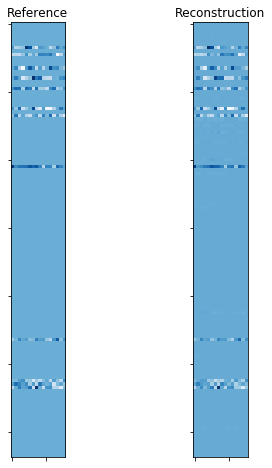

In [31]:
fig = plot.figure(figsize=(6, 8))
plot.subplot(1, 2, 1)
plot.imview(x0, cmap=plot.cm.Blues, title='Reference', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(x, cmap=plot.cm.Blues, title='Reconstruction', fig=fig)
# # plot.subplot(1, 2, 3)
# plot.imview(s, cmap=plot.cm.Blues, title='Noise', fig=fig)


fig.show()

In [14]:
import spectrogram
import os
import sys
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import dict_learning

In [15]:
digfile_name = os.path.basename(os.path.normpath("GEN3CH_4_009.dig"))

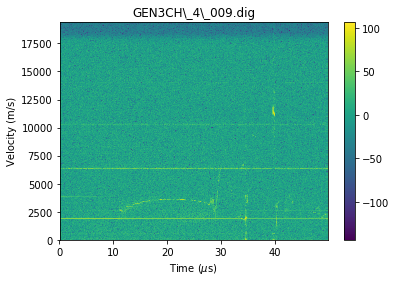

In [16]:
sp = spectrogram.Spectrogram(digfile_name)
sgram = sp.spectrogram(0,50e-6)

axes1 = plt.axes()
sp.plot(axes1, sgram)